<a id='home'></a>
# Project 2: Brazil No-show Medical Appointments Dataset


### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#processing">1. Data Processing</a></li>
<li><a href="#cleaning">2. Data Cleaning</a></li>
<li><a href="#analysis">3. Data Analysis & Visualisation</a></li>    
<li><a href="#conclusion">4. Conclusion</a></li>
</ul>

<a id='intro'></a>
### Introduction

In this submission I will be investigating what factors, if any, that play a part in why  appointments are not attended by patients in Brazil.

> **Points to note:**
* ‘ScheduledDay’ tells us on what day the patient set up their appointment.
* ‘Neighborhood’ indicates the location of the hospital.
* ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.!

**What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?**

To answer the above question I will be analysing the following specific questions:
1. What is the breakdown of male to female patients, which gender comparatively attends less appointments?
2. What is the average age of patients who attend & do not attend appointments?
3. What is the breakdown of patients who receive a text prior to an appointment?

I will then analyse the variables *Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received & No-show* to ascertain if any causal inferences can be made from the data and whether it may have an impact on whether a patient attends an appointment. 


<a id='processing'></a>
### 1. Data Processing

In [1]:
# Step 1 - import relevant libraries into Jupyter Notebooks

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp




In [2]:
# Step 2 - import ('read in') dataset into Jupyter Notebooks for first 10 rows
df = pd.read_csv("UD-P2_Brazil_no_show_appt_data_v0.6.csv")
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.600000e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÃšBLICA,0,1,0,0,0,0,No
6,7.340000e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.450000e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.640000e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.810000e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [3]:
# Step 3 - returns a tuple of the dimensions of the data (outputs no of columns vs rows)

print(df.shape)


(110527, 14)


In [4]:
# Step 4 - returns id numbers and name of columns
for i, v in enumerate(df.columns):
    print(i, v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show


In [5]:
# Step 5 - returns breakdown of the data types within the dataset and any anomalies i.e. int, string, any null values)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Step 6 - returns the number of unique values in each column

df.nunique()

PatientId           6100
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

**To Do:** 
* investigate [handicap] column it has a unique value of 5 whereas the other headings from [scholarship] to [appt_attended] have 2 (either 0 or 1, true or false).

In [7]:
# Returns list of rows where all the data in row is the same
sum(df.duplicated())

0

In [8]:
# Step 6 - returns statistics data summary (describes full breakdown of data into
# count, mean, Std Dev, percentile etc)

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Processing Summary - Actions

Initial review of the data shows that there are no missing values, I'm happy with the column names and there are only a few elements that I need to do from a data cleaning perspective.  From the above table you can see that age has a minus 1 value, I tried to change this to a 0 using the replace method but kept receiving the error *TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'*, as I don't believe this will affect the analysis I intend to carry out I will just assume -1 is a new born baby.  
In summary the actions I will carry out in the Data Cleaning sections are:
1. convert to all lowercase
2. replace gender data from 'M' & 'F' to 'Male' & 'Female' 
3. remove columns [PatientId] and [AppointmentID] as not required in any of my analysis 
4. add underscores between two words where required
5. convert Hipertension to Hypertension
6. convert SMS_received to text_recd
7. change Neighbourhood to hosp_location
8. convert locations in [hops_location] to titlecase 
9. convert  [scheduled_day] and [appointment_day] to the datetime dtype
10. convert data in column [no_show] from yes and no to zeros and ones which is consistent with the other columns, [0] = No (attended appt), [1] = Yes (did NOT attend) 
. convert ID [no_show] to an int type now that numbers have replaced strings 
. investigate the [handcap] column as it has 5 unique values





<ul>
<li><a href="#home">Go to beginning </a></li>
</ul>    

<a id='cleaning'></a>
## 2. Data Cleaning

In this section I will carry out the actions highlighted in my Data Processing Summary

*Comment:* Looking at the data and the questions I intend to address I have decided that the [patientid] and [appointmentid] columns are not required for any of my calculations or analysis hence I will remove them.

In [9]:
# Action 1: convert all headings to lowercase
df.columns = map(str.lower, df.columns)
df.head()


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# Action 2 - convert M & F to Male & Female in column (gender]
df["gender"].replace({"M": "Male", "F": "Female"}, inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.990000e+13,5642903,Female,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,Male,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,Female,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,Female,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,Female,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
# Action 3: remove [PatientId] column as not required for analysis

df.drop(['patientid', 'appointmentid'], axis=1, inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,Female,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,Male,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,Female,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,Female,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,Female,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# Action 4 - 7: add underscores for scheduledday and appointnmentday, change Hipertension to Hypertension, change SMS_received to text_recd
# change Neighbourhood to hosp_location

df.rename(columns={'scheduledday':'scheduled_day', 'appointmentday':'appointment_day','neighbourhood':'hosp_location',
'hipertension':'hypertension', 'sms_received':'text_recd', 'no-show':'no_show'}, inplace=True)
df.head()

,gender,scheduled_day,appointment_day,age,hosp_location,scholarship,hypertension,diabetes,alcoholism,handcap,text_recd,no_show
0,Female,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,Male,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,Female,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,Female,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,Female,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# Action 8: convert location names in [hops_location] column to propercase

df.hosp_location.str.title()




0           Jardim Da Penha
1           Jardim Da Penha
2             Mata Da Praia
3         Pontal De Camburi
4           Jardim Da Penha
                ...        
110522          Maria Ortiz
110523          Maria Ortiz
110524          Maria Ortiz
110525          Maria Ortiz
110526          Maria Ortiz
Name: hosp_location, Length: 110527, dtype: object

In [14]:
df.head()

,gender,scheduled_day,appointment_day,age,hosp_location,scholarship,hypertension,diabetes,alcoholism,handcap,text_recd,no_show
0,Female,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,Male,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,Female,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,Female,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,Female,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
# Action 9: convert ID [scheduled_day] and [appointment_day] to the datetime dtype
df.scheduled_day=pd.to_datetime(df.scheduled_day)
df.appointment_day=pd.to_datetime(df.appointment_day)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   gender           110527 non-null  object             
 1   scheduled_day    110527 non-null  datetime64[ns, UTC]
 2   appointment_day  110527 non-null  datetime64[ns, UTC]
 3   age              110527 non-null  int64              
 4   hosp_location    110527 non-null  object             
 5   scholarship      110527 non-null  int64              
 6   hypertension     110527 non-null  int64              
 7   diabetes         110527 non-null  int64              
 8   alcoholism       110527 non-null  int64              
 9   handcap          110527 non-null  int64              
 10  text_recd        110527 non-null  int64              
 11  no_show          110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usag

In [16]:
# Action 10: convert data in column [no_show] from yes and no to zeros and ones which is consistent with the other columns, 
# [0] = No (attended appt), [1] = Yes (did NOT attend) 
df['no_show'].replace({'No': '0', 'Yes': '1'}, inplace=True)
df.head()


,gender,scheduled_day,appointment_day,age,hosp_location,scholarship,hypertension,diabetes,alcoholism,handcap,text_recd,no_show
0,Female,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,Male,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,Female,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,Female,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,Female,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [17]:
# Action 11: convert data in [no_show] column from string to integer
df.no_show=pd.to_numeric(df.no_show)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   gender           110527 non-null  object             
 1   scheduled_day    110527 non-null  datetime64[ns, UTC]
 2   appointment_day  110527 non-null  datetime64[ns, UTC]
 3   age              110527 non-null  int64              
 4   hosp_location    110527 non-null  object             
 5   scholarship      110527 non-null  int64              
 6   hypertension     110527 non-null  int64              
 7   diabetes         110527 non-null  int64              
 8   alcoholism       110527 non-null  int64              
 9   handcap          110527 non-null  int64              
 10  text_recd        110527 non-null  int64              
 11  no_show          110527 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(8), object(2)
memory usag

In [18]:
# Action 12: Investigate unique values for [handicap] column
df.handcap.unique()



array([0, 1, 2, 3, 4], dtype=int64)

In [19]:
# Action 12: return list of values that have handicap value greater than 1 
df.loc[df['handcap'] >1]


,gender,scheduled_day,appointment_day,age,hosp_location,scholarship,hypertension,diabetes,alcoholism,handcap,text_recd,no_show
946,Male,2016-04-14 09:26:08+00:00,2016-04-29 00:00:00+00:00,94,BELA VISTA,0,1,1,0,2,1,0
1665,Male,2016-03-30 09:16:41+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,1,0
1666,Male,2016-03-30 09:16:41+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,0,0
2071,Male,2016-04-29 10:08:48+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,0,0
2091,Female,2016-04-29 08:13:59+00:00,2016-04-29 00:00:00+00:00,11,ANDORINHAS,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
108376,Female,2016-06-01 08:48:28+00:00,2016-06-07 00:00:00+00:00,44,ROMÃƒO,0,1,1,0,2,1,0
109484,Male,2016-05-31 11:45:57+00:00,2016-06-02 00:00:00+00:00,64,DA PENHA,0,1,1,0,2,0,0
109733,Female,2016-06-03 16:11:00+00:00,2016-06-07 00:00:00+00:00,34,JUCUTUQUARA,0,0,0,0,2,1,0
109975,Male,2016-06-02 16:07:36+00:00,2016-06-06 00:00:00+00:00,39,PRAIA DO SUÃ,1,0,0,0,2,1,0


*Comment:*
As mentioned previously the above 'unique' query confirms that there are five integers where there should only be two (0 and 1), the problem is that it is not clear how to assign these values as 2, 3 and 4 could be either true or false.  

From the query of which rows have integers greater than 1 you can see that 199 rows of the [handcap] column have integers ranging from 0 - 4.  I do not want to reassign the 2, 3 & 4 to 0's and 1's as know way to find out if numbers mean the patient had a handicap or not. 

<ul>
<li><a href="#home">Go to beginning </a></li>
</ul>   

<a id='analysis'></a>
## 3. Data Analysis & Visualisation

#### High Level Analysis

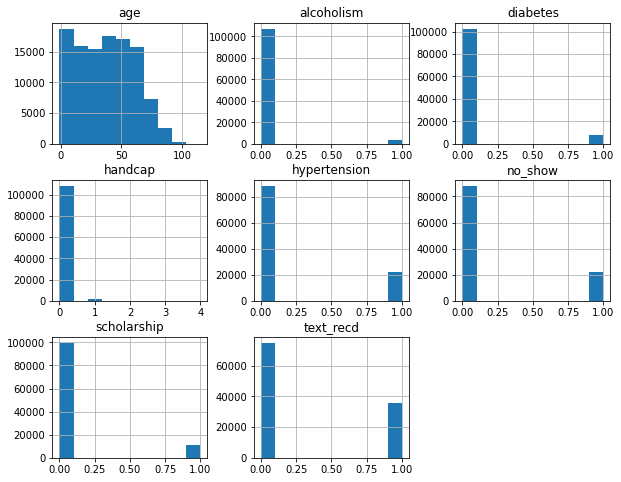

In [20]:
# Histograms of entire dataset
df.hist(figsize=(10, 8));




*Comment:*
Initial review of the graphs for [alcoholism] to [text_recd] show that the totals are quite skewed to one operator (False) significantly more than the other.  The variable that has a more even allocation is text_recd.

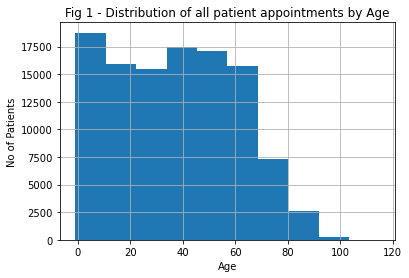

In [21]:
# Distribution of age range of all patients
df[('age')].hist()
plt.title("Fig 1 - Distribution of all patient appointments by Age")
plt.xlabel('Age')
plt.ylabel('No of Patients');

*Comment:*
From Fig 1 you can see that the distribution of appointments amongst all ages is most from ages 0 - 10, the next highest are then ages from 0 - 50.  

##### Attendence Analysis

In [22]:
# Breakdown of all patients by attendance.  0 = Attended appt
df['no_show'].value_counts()

0    88208
1    22319
Name: no_show, dtype: int64

In [23]:
# Percentage breakdown of all patients by attendance.  0 = Attended appt
df['no_show'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

0    79.8%
1    20.2%
Name: no_show, dtype: object

*Comments:* Out of 110,527 patient appointments 88,208 (79.8%) were attended by patients. 


##### Gender Analysis - 
Q1. What is the breakdown of male to female patients, which gender comparatively attends less appointments?



In [24]:
# Breakdown of all patients by gender
df['gender'].value_counts()

Female    71840
Male      38687
Name: gender, dtype: int64

In [25]:
# percentage breakdown of all patients by gender 
df['gender'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

Female    65.0%
Male      35.0%
Name: gender, dtype: object

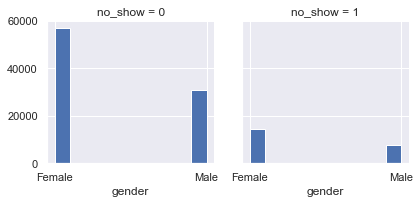

In [26]:
sns.set(style='darkgrid')
a = sns.FacetGrid(df, col = 'no_show')
a.map(plt.hist, 'gender')


*Comment:*
Females account for 65% of all appointments

##### Age Analysis
Q2. What is the average age of patients who attend & do not attend appointments?

In [27]:
# Defining variables
attend = df.no_show == False
not_attend = df.no_show == True

In [28]:
# Average of male patients who attended appointment 
df.age[attend].mean()

37.790064393252315

In [29]:
df.age[not_attend].mean()

34.31766656212196

*Comments:* The average age of all patients who have attended an appointment is 38 (rounded up) which would tie in with the age distribution chart in Fig 1.

### The following analysis is a breakdown for columns [scholarship] to [no_show]

In [30]:
# Groupby filters - defining variables
groupby_scholarship = df['scholarship'].groupby(df['scholarship'])
groupby_scholarship

### Scholarship data

In [31]:
# Breakdown of scholorship enrollment
df.groupby(['scholarship']).agg(  # 0 = Not enrolled into scholarship scheme
 {'scholarship': ['count']}
)

,scholarship
,count
scholarship,
0,99666
1,10861


In [32]:
# Percentage breakdown of scholarship enrollment
df['scholarship'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

0    90.2%
1     9.8%
Name: scholarship, dtype: object

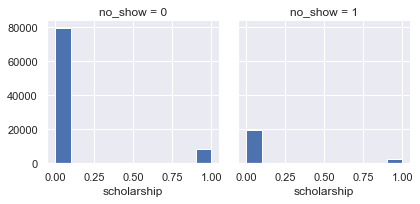

In [33]:
# Comparison of patient appointment attendence - by Scholarship
# no_show = 0 (Attended appointment)
# no_show = 1 (Did NOT attend appointment)

sns.set(style='darkgrid')
a = sns.FacetGrid(df, col = 'no_show')
a.map(plt.hist, 'scholarship')


*Comments:*
90.2% (99,666) of patients are not enrolled into the Scholarship scheme, only circa 8k patients who attended an appointment were enrolled. 

### Hypertension data

In [34]:
# Comparison of patients who have attended appointment - by Age
df.groupby(['hypertension']).agg(  # 0 = attended
 {'hypertension': ['count']}
)

,hypertension
,count
hypertension,
0,88726
1,21801


In [35]:
# Percentage breakdown of hypertension status of patients
df['hypertension'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

0    80.3%
1    19.7%
Name: hypertension, dtype: object

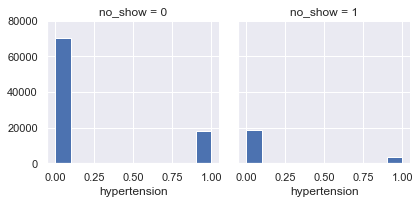

In [36]:
# Comparison of patient appointment attendence - by Hypertension
# no_show = 0 (Attended appointment)
# no_show = 1 (Did NOT attend appointment)
sns.set(style='darkgrid')
a = sns.FacetGrid(df, col = 'no_show')
a.set(ylim=(0, 80000))
a.map(plt.hist, 'hypertension')

*Comments:*
80.3% (88,726) of all patients do not have hypertension.  70k patients attended an appointment who do not have hypertension. Of the circa 21k that do only 3,772 patients did not attend an appointment, more than 18k patients  who did not have hypertension did not attend an appointment.  

### Diabetes data


In [37]:
# Comparison of patients who have attended appointment - by Diabetes
df.groupby(['diabetes']).agg(  # 0 = attended
 {'diabetes': ['count']}
)

,diabetes
,count
diabetes,
0,102584
1,7943


In [38]:
# Percentage breakdown of diabetes status of patients
df['diabetes'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

0    92.8%
1     7.2%
Name: diabetes, dtype: object

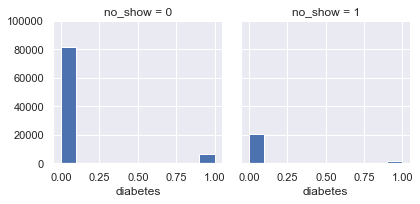

In [39]:
# Comparison of patient appointment attendence - by diabetes
# no_show = 0 (Attended appointment)
# no_show = 1 (Did NOT attend appointment)
sns.set(style='darkgrid')
a = sns.FacetGrid(df, col = 'no_show')
a.set(ylim=(0, 100000))
a.map(plt.hist, 'diabetes')

*Comments:*
92% (102,584) patients do not have diabetes, of that circa 80k attended an appointment. 

### Alcoholism data

In [40]:
# Comparison of patients who have attended appointment - by Alcoholism
df.groupby(['alcoholism']).agg( # 0 = attended
 {'alcoholism': ['count']}
)

,alcoholism
,count
alcoholism,
0,107167
1,3360


In [41]:
# Percentage breakdown of alcoholism status of patients
df['alcoholism'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

0    97.0%
1     3.0%
Name: alcoholism, dtype: object

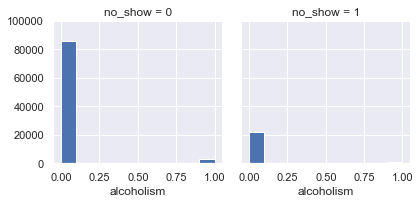

In [42]:
# Comparison of patient appointment attendence - by Alcoholism
# no_show = 0 (Attended appointment)
# no_show = 1 (Did NOT attend appointment)
sns.set(style='darkgrid')
a = sns.FacetGrid(df, col = 'no_show')
a.set(ylim=(0, 100000))
a.map(plt.hist, 'alcoholism')

*Comments:*
97% (107,167) of patients do not have alcoholism, of those patients who did not attend an appointment none (zero) of them were alcoholics.

### Handcap data

In [43]:
# Comparison of patients who have attended appointment - by Handicap
df.groupby(['handcap']).agg( # 0 = attended
 {'handcap': ['count']}
)

,handcap
,count
handcap,
0,108286
1,2042
2,183
3,13
4,3


In [44]:
# Percentage breakdown of handcap status of patients
df['handcap'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

0    98.0%
1     1.8%
2     0.2%
3     0.0%
4     0.0%
Name: handcap, dtype: object

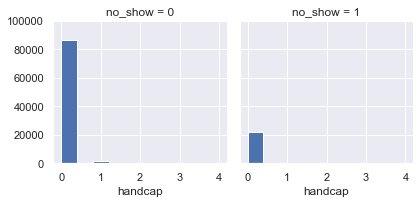

In [45]:
# Comparison of patient appointment attendence - by Handicap
# no_show = 0 (Attended appointment)
# no_show = 1 (Did NOT attend appointment)
sns.set(style='darkgrid')
a = sns.FacetGrid(df, col = 'no_show')
a.set(ylim=(0, 100000))
a.map(plt.hist, 'handcap')

*Comments:*
98% (108,286) of patients do not have a disability, the 199 rows that had either 2,3 or 4 would not make a material difference.  Of the 108,286, over 80k patients who did not have a disability attended an appointment. 

### Text Received data

In [46]:
# Comparison of patients who have attended appointnment - by Text Received
df.groupby(['text_recd']).agg( # 0 = attended
 {'text_recd': ['count']}
)

,text_recd
,count
text_recd,
0,75045
1,35482


In [47]:
# Percentage breakdown of text received status of patients
df['text_recd'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

0    67.9%
1    32.1%
Name: text_recd, dtype: object

**Q3. What is the breakdown of patients who receive a text prior to an appointment?**


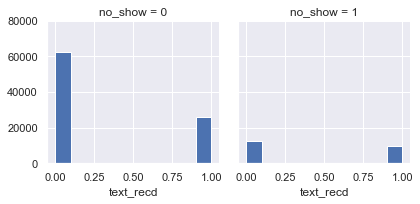

In [48]:
# Comparison of patient appointment attendence - by Text Received
# no_show = 0 (Attended appointment)
# no_show = 1 (Did NOT attend appointment)
sns.set(style='darkgrid')
a = sns.FacetGrid(df, col = 'no_show')
a.set(ylim=(0, 80000))
a.map(plt.hist, 'text_recd')

*Comments:*
67.9% (75,045) of all patients did not receive a text, more patients who did receive a text attended an appointment (circa 25k) than those who didn't receive a text and did not attend appointment (circa 10k).


<ul>
<li><a href="#home">Go to beginning </a></li>
</ul>    

<a id='conclusion'></a>
## 4. Conclusion (Revised)



*Additional Revisional Comments*

In order to delve deeper into the reasons why patients do not show up for appointments it's very important that the sample size is truly representative of the population in every factor from gender to age to location.   I believe that a sample size of 100,000 is more than adequate but one of the things I noticed is the imbalance of male to female patients.   To my mind if you are going to survey 100k patients then the split should be as near to 50:50 as possible, as it stands females are nearly double the sample size of males.  

Another important element is that the patient ID no is not unique, this is not ideal as there is no way of analysing those patients in more detail e.g. how many appointments have they missed, do they sometimes receive a text, where is the hospital location they attend, indeed is it always at the same location. All of these elements would have been good to plot in a scatter graph to see if there is any correlation.

                                                  -------------------------------------



From the simple analysis carried out based primarily on charts and counts, unfortunately was not able to conduct an inference statistical tests, I have come to the following generic conclusions:
* Females have more appointments than males and correspondingly have less non-attendances comparative to males
* The average age of patients who attend appointments is 37, the average age for those who didn't attend is 34.  Generally speaking the older you are the less likely you are to not attend an appointment, this is based on adults.   
* Patients who receive a text are not necessarily more likely to attend an appointment
* In general patients with any sort of medical condition or welfare need attend more appointments than those who do not which is what you would expect, 'healthier' patients may be more indifferent to not attending an appointment than those with a pre-existing condition. 

#### Note to Reviewer:
I would have liked to carry out more scatter plots and histogram charts like the one below, taken from a plot I created in Excel, but unfortunately I couldn't produce it, even after numerous hours scouring the 'net!  Same thing for trying to change the date of appointment date to a day of the week, I wanted to investigate if there are particular days that patients do not attend.

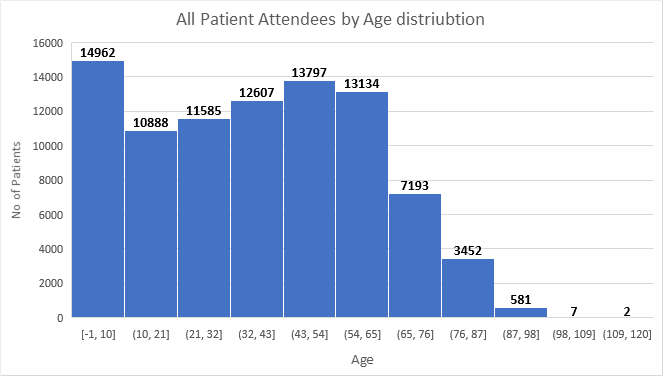

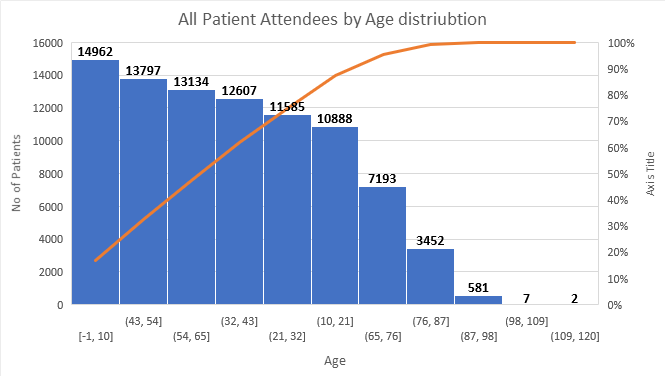

### Attributation
I used the following resources in the completion of this project:
* **CS Dojo** | Youtube | https://www.youtube.com/watch?v=a9UrKTVEeZA&t=371s
* **W3Resource** | Website | https://www.w3resource.com/graphics/matplotlib/basic/matplotlib-basic-exercise-5.php
* **Earthdatascience.org** Jenny Palomino & Leah Wasser | Website | https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/
* **Ryan Noonan**  youTube | https://www.youtube.com/watch?v=0Juk_Ufyea4> 




<ul>
<li><a href="#home"> ...END...  go to beginning </a></li>
</ul>    